<a href="https://colab.research.google.com/github/Hagar-zakaria/Predictive-Analytics-for-Marketing-Expansion-Sales-Forecasting-and-Customer-Segmentation/blob/main/%22Predictive_Analytics_for_Marketing_Expansion_Sales_Forecasting_and_Customer_Segmentation%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [ ]:
# Load dataset using full path
data = pd.read_csv('sales_data.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [ ]:
# Checking for missing values
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           1
Customer_Gender     1
Country             1
State               1
Product_Category    1
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

In [ ]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [ ]:
# Convert categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Display the first few rows of the processed dataset
data.head()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Date_2013-07-02,...,"Product_Half-Finger Gloves, L","Product_Half-Finger Gloves, M","Product_Half-Finger Gloves, S",Product_Hitch Rack - 4-Bike,Product_Mountain Bottle Cage,Product_Road Bottle Cage,"Product_Sport-100 Helmet, Black","Product_Sport-100 Helmet, Blue","Product_Sport-100 Helmet, Red",Product_Water Bottle - 30 oz.
0,26,2013,19,8.0,45.0,120.0,590.0,360.0,950.0,False,...,False,False,False,True,False,False,False,False,False,False
1,26,2015,19,8.0,45.0,120.0,590.0,360.0,950.0,False,...,False,False,False,True,False,False,False,False,False,False
2,23,2014,49,23.0,45.0,120.0,1366.0,1035.0,2401.0,False,...,False,False,False,True,False,False,False,False,False,False
3,23,2016,49,20.0,45.0,120.0,1188.0,900.0,2088.0,False,...,False,False,False,True,False,False,False,False,False,False
4,15,2014,47,4.0,45.0,120.0,238.0,180.0,418.0,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
data.columns

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue', 'Date_2013-07-02',
       ...
       'Product_Half-Finger Gloves, L', 'Product_Half-Finger Gloves, M',
       'Product_Half-Finger Gloves, S', 'Product_Hitch Rack - 4-Bike',
       'Product_Mountain Bottle Cage', 'Product_Road Bottle Cage',
       'Product_Sport-100 Helmet, Black', 'Product_Sport-100 Helmet, Blue',
       'Product_Sport-100 Helmet, Red', 'Product_Water Bottle - 30 oz.'],
      dtype='object', length=887)

In [ ]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data.shape


(31786, 887)

In [ ]:
# Summary statistics
print(data.describe())

                Day          Year  Customer_Age  Order_Quantity     Unit_Cost  \
count  31786.000000  31786.000000  31786.000000    31786.000000  31786.000000   
mean      15.567483   2014.576166     36.116970       14.958944      6.634241   
std        8.818741      1.115426     11.046992        8.718587      8.917699   
min        1.000000   2013.000000     17.000000        1.000000      2.000000   
25%        8.000000   2014.000000     28.000000        7.000000      2.000000   
50%       15.000000   2014.000000     35.000000       15.000000      4.000000   
75%       23.000000   2016.000000     43.000000       22.000000      8.000000   
max       31.000000   2016.000000     87.000000       32.000000     59.000000   

         Unit_Price        Profit          Cost       Revenue  
count  31786.000000  31786.000000  31786.000000  31786.000000  
mean      16.413641    104.453218     86.511515    190.964733  
std       24.170548    143.155602     97.172296    234.889964  
min        5.0

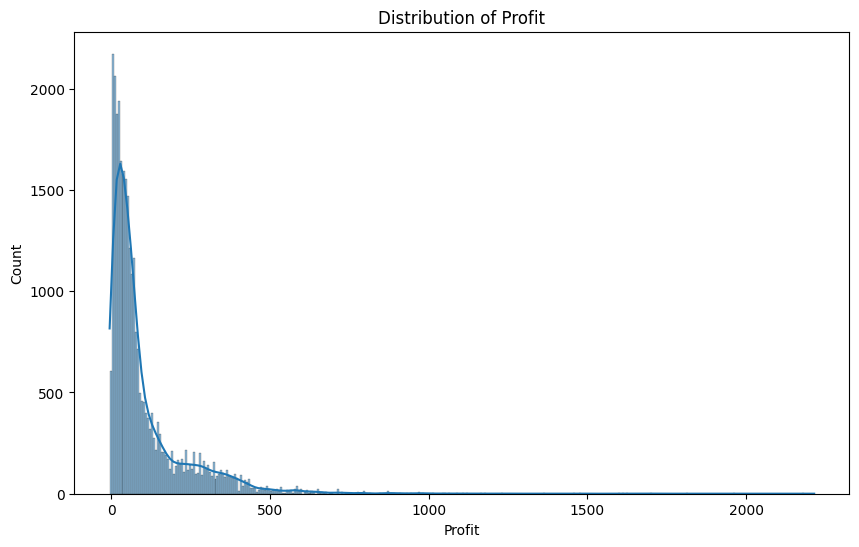

In [ ]:
# Visualize the distribution of 'Profit'
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.show()


In [ ]:
# Filter the dataset to include only numerical columns
numerical_data = data.select_dtypes(include=[np.number])



In [ ]:

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()



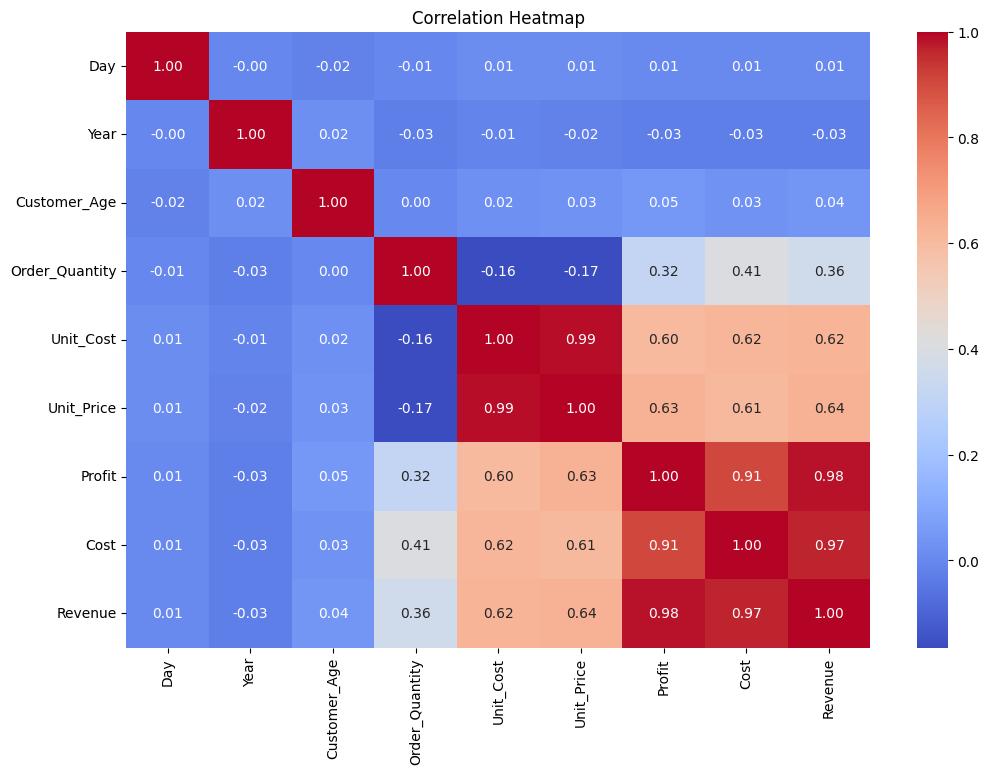

In [ ]:
# Create a correlation heatmap for the subset of features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

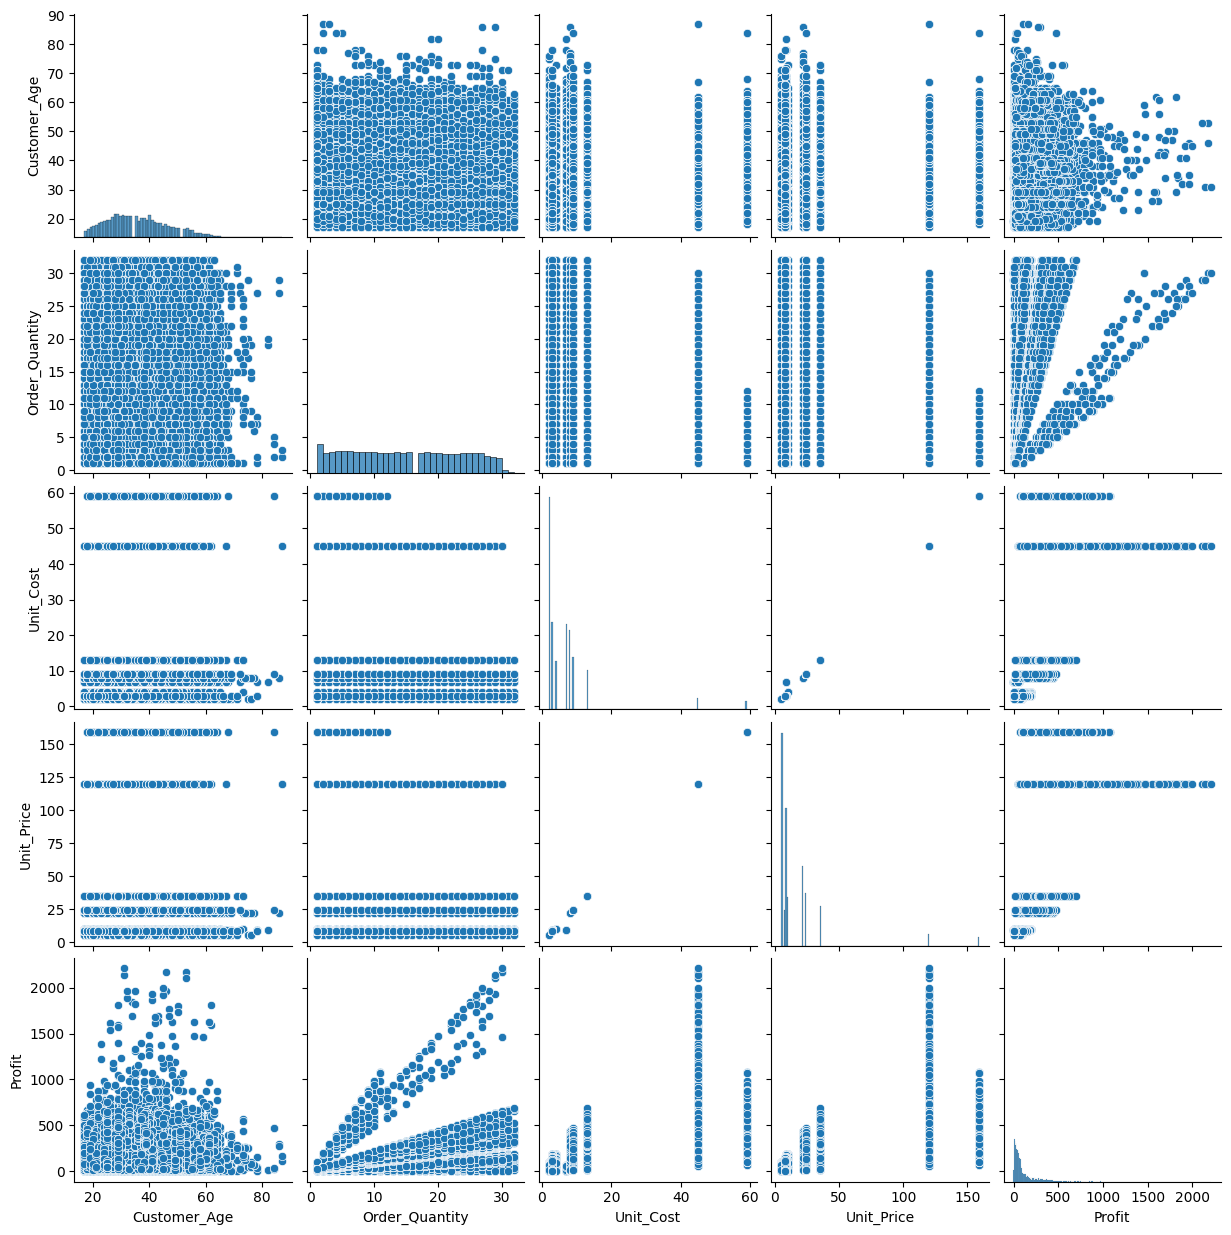

In [ ]:
# Pairplot for detailed EDA (only a subset for clarity)
sns.pairplot(data[['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']])
plt.show()

In [ ]:
# Feature Engineering: Create new features
data['Profit_Margin'] = data['Profit'] / data['Revenue']
data['Revenue_Per_Unit'] = data['Revenue'] / data['Order_Quantity']
data['Cost_Per_Unit'] = data['Cost'] / data['Order_Quantity']

In [ ]:
# Select relevant features for the model
features = ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
            'Profit_Margin', 'Revenue_Per_Unit', 'Cost_Per_Unit']
target = 'Profit'

In [ ]:
# Display the first few rows of the prepared dataset
print(data[features + [target]].head())

   Customer_Age  Order_Quantity  Unit_Cost  Unit_Price  Profit_Margin  \
0            19             8.0       45.0       120.0       0.621053   
1            19             8.0       45.0       120.0       0.621053   
2            49            23.0       45.0       120.0       0.568930   
3            49            20.0       45.0       120.0       0.568966   
4            47             4.0       45.0       120.0       0.569378   

   Revenue_Per_Unit  Cost_Per_Unit  Profit  
0        118.750000           45.0   590.0  
1        118.750000           45.0   590.0  
2        104.391304           45.0  1366.0  
3        104.400000           45.0  1188.0  
4        104.500000           45.0   238.0  


In [20]:
# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

In [22]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [23]:
# Evaluate models
results = {}
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [24]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE          MSE        R2
Linear Regression  49.116312  6512.703033  0.657821
Random Forest       0.318526     7.474325  0.999607
Gradient Boosting   5.118615    76.435107  0.995984


Interpretation of Model Results
Linear Regression:

MAE: 49.116
MSE: 6512.703
R²: 0.658
Interpretation: Linear Regression has a relatively higher error and lower R² compared to the other models, indicating it might not be capturing the complexity of the data well.
Random Forest:

MAE: 0.319
MSE: 7.474
R²: 0.9996
Interpretation: Random Forest shows excellent performance with very low error values and an R² close to 1, indicating it fits the data extremely well.
Gradient Boosting:

MAE: 5.119
MSE: 76.435
R²: 0.996
Interpretation: Gradient Boosting also performs well but with slightly higher errors compared to Random Forest. Its R² value is also very high, indicating a good fit.
Given the superior performance of the Random Forest model, we will proceed with this model for further analysis and deployment.

**Let's take a closer look at the feature importance for the Random Forest model to understand which features are contributing the most to the predictions.**



In [25]:
# Feature importance for Random Forest
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

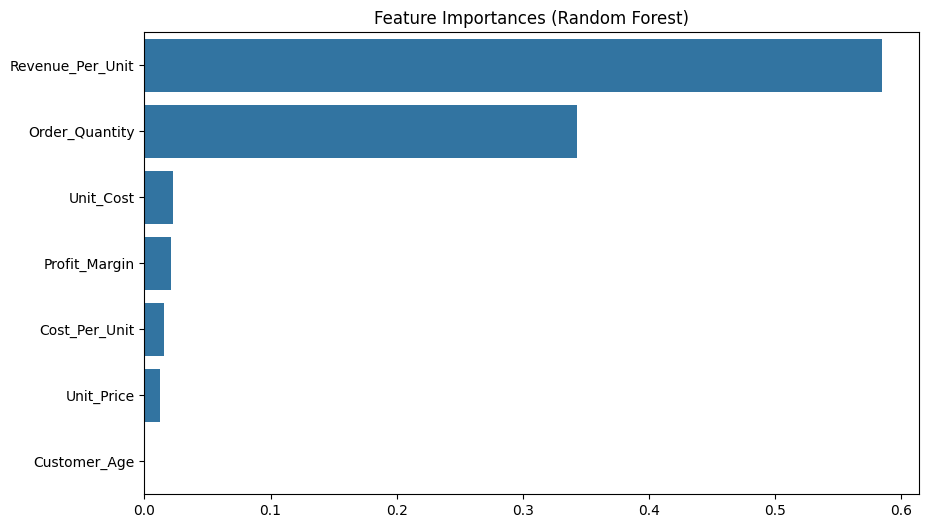

In [26]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title('Feature Importances (Random Forest)')
plt.show()

Interpretation of Feature Importance
Based on the feature importance plot from the Random Forest model, we can see which features are contributing the most to the model's predictions of profitability.

**Revenue_Per_Unit:**

This is the most important feature in the model.
It indicates the revenue generated per unit sold, which makes sense as a key driver of profit.

**Order_Quantity:**

This is the second most important feature.
The number of units ordered directly impacts the total sales and, consequently, the profit.

**Other Features:**

Unit_Cost, Profit_Margin, Cost_Per_Unit, Unit_Price, Customer_Age have less impact on the model compared to the top two features.

These features still contribute to the model but to a lesser extent.
Recommendations

**Given the importance of these features, here are some strategic recommendations:**

- Focus on Increasing Revenue Per Unit:

Implement pricing strategies to maximize revenue per unit sold.
Consider upselling and cross-selling tactics to increase the average revenue per sale.

- Optimize Order Quantities:

Analyze and optimize inventory and sales strategies to increase order quantities.

- Implement promotions and discounts strategically to encourage bulk purchases.
Monitor and Control Costs:

Keep an eye on unit costs and cost per unit to ensure profitability is maintained.

Negotiate better terms with suppliers to reduce costs without compromising quality.

- Customer Segmentation and Targeting:

Although customer age is not a major factor, understanding the demographics of high-value customers can help tailor marketing strategies.

Use insights from profit margin and unit price to segment customers and target them with personalized offers.

# **Additional Analysis** to make sure that the random forest is the best model to be implmented

In [27]:
# Cross-validation scores for each model
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = {'CV Mean R2': np.mean(cv_score), 'CV Std R2': np.std(cv_score)}



In [28]:
# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df)


                   CV Mean R2  CV Std R2
Linear Regression   -0.505277   0.900748
Random Forest        0.844090   0.241472
Gradient Boosting    0.833834   0.228123


**Insights from Cross-Validation**

- The Random Forest model shows the highest average R² and relatively low variance, indicating it is the most reliable and stable model among the three tested.

- The Gradient Boosting model also performs well, with a slightly lower mean R² compared to Random Forest but still a strong performer.

- The Linear Regression model performs poorly and is not suitable for this dataset.

**Final Recommendations**

Given the performance of the models, the Random Forest model is recommended for deployment due to its high R² score and stability across different data folds.

# Code for Deployment and Monitoring

Here is the code snippet to save the model for deployment and set up monitoring:

**Saving the Model for Deployment**

This part of the code is for saving the trained Random Forest model to a file. This file can later be loaded for making predictions without having to retrain the model.

In [29]:
import joblib

# Save the best performing model (Random Forest) for deployment
joblib.dump(rf_model, 'market_expansion_model.pkl')


['market_expansion_model.pkl']

**Loading the Model for Predictions**

This part of the code demonstrates how to load the saved model and use it to make predictions. This is what you would do in a production environment where you need to make predictions on new data.



In [30]:
rf_model = joblib.load('market_expansion_model.pkl')

In [31]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [32]:
# Evaluate the predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 0.31852626612142193
Mean Squared Error (MSE): 7.4743251179616275
R-squared (R2): 0.9996072968144682


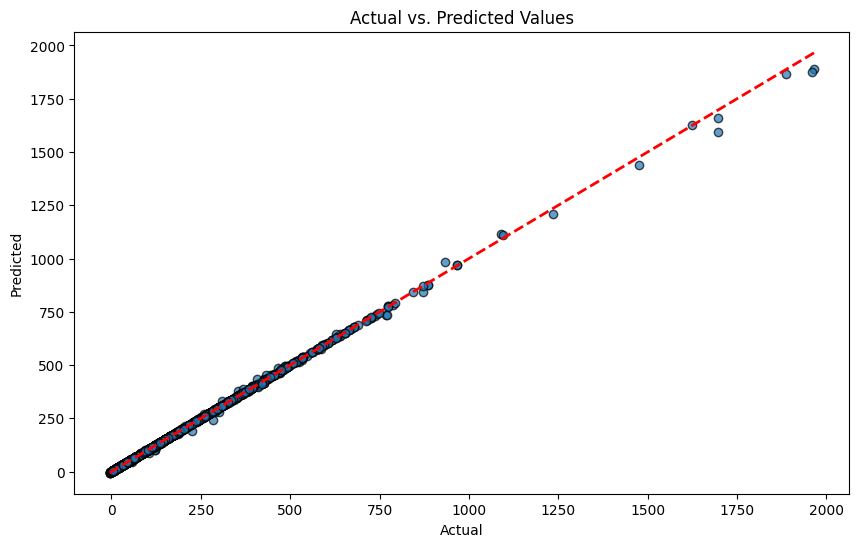

In [34]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

#Implment the prediction on New Data we Can choose and write down

In [35]:
# Example new data for prediction
new_data = pd.DataFrame({
    'Customer_Age': [35, 45, 50],
    'Order_Quantity': [10, 20, 30],
    'Unit_Cost': [50, 40, 60],
    'Unit_Price': [120, 150, 200],
    'Profit_Margin': [0.2, 0.3, 0.25],
    'Revenue_Per_Unit': [150, 180, 210],
    'Cost_Per_Unit': [40, 35, 45]
})

In [36]:
# Predict the profit for the new data
predicted_profit = rf_model.predict(new_data)
new_data['Predicted_Profit'] = predicted_profit

print(new_data)

   Customer_Age  Order_Quantity  Unit_Cost  Unit_Price  Profit_Margin  \
0            35              10         50         120           0.20   
1            45              20         40         150           0.30   
2            50              30         60         200           0.25   

   Revenue_Per_Unit  Cost_Per_Unit  Predicted_Profit  
0               150             40            800.80  
1               180             35           1244.23  
2               210             45           1800.29  


**Next Steps:**

- Deploy the Model: The trained Random Forest model can be deployed for real-time predictions, helping the marketing team make data-driven decisions for market expansion.

- Ongoing Monitoring: Regularly monitor the model’s performance to ensure its accuracy and update it with new data as needed.

- Actionable Strategies: Implement the recommended strategies to optimize revenue and profit. Use the model’s insights to guide marketing campaigns and promotional activities.

# Given the prediction output, we can derive several actionable insights for marketing purposes:

1. Customer Demographics and Targeting
Insight: Understanding the age groups that are generating the most profit.

Action: Tailor marketing campaigns to target age groups with higher profitability, such as age groups 45 and 50 in this example. Create personalized advertisements, promotions, and content that resonate with these demographics.
2. Order Quantity Analysis
Insight: Higher order quantities correlate with higher predicted profits.

Action: Encourage bulk purchases by offering discounts or incentives for larger orders. Implement marketing strategies like "Buy More, Save More" campaigns to increase order quantities.
3. Product Pricing and Cost Management
Insight: Analyzing the relationship between unit cost, unit price, and profit margins.

Action: Adjust pricing strategies to optimize profit margins. For example, if higher unit prices yield higher profit margins, consider repositioning the product as a premium offering. Alternatively, find ways to reduce unit costs without compromising quality to enhance profit margins.
4. Revenue Per Unit
Insight: Revenue per unit varies across different orders.

Action: Focus marketing efforts on promoting products or bundles that offer higher revenue per unit. Highlight the value proposition of these high-revenue products in marketing materials.
5. Predicted Profit Maximization
Insight: Predicted profit values indicate potential high-gain customers or orders.

Action: Prioritize marketing resources on customers or orders predicted to yield the highest profit. Implement loyalty programs or exclusive deals for these high-value customers to retain their business.
Example Marketing Strategies
1. Targeted Email Campaigns
Target Group: Customers aged 45 and 50.
Content: Personalized product recommendations, exclusive discounts, and loyalty rewards.
Goal: Increase order quantities and repeat purchases.
2. Bulk Purchase Incentives
Strategy: Offer tiered discounts based on order quantity (e.g., 10% off for orders over 10 units, 15% off for orders over 20 units).
Goal: Encourage larger purchases to boost overall sales volume and profitability.
3. Premium Product Positioning
Strategy: Rebrand and market products with high unit prices and profit margins as premium options.
Content: High-quality visuals, testimonials, and highlighting unique product features.
Goal: Justify higher prices and attract customers willing to pay a premium.
4. Revenue Optimization
Focus: Promote products with the highest revenue per unit.

**Action**: Create special campaigns, bundle offers, and highlight these products on the website and in promotional materials.

**Goal**: Maximize revenue from each sale.
Implementing the Strategies

**Data-Driven Decision Making**: Use the predicted profit data to inform which customer segments to target and what products to promote.

**Marketing Campaigns**: Design and execute campaigns based on the insights derived from the predictive model output.

**Monitoring and Adjustment**: Continuously monitor the performance of these campaigns and adjust strategies based on real-time data and feedback.

By leveraging the predictive model outputs effectively, marketing teams can make informed decisions that enhance customer targeting, optimize pricing strategies, and ultimately drive higher profitability.